##**Name - Affan**
##**Roll No. - 242210001**
##**Date - 01/04/2025**

# **K-means clustering**

In [ ]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from PIL import Image

**(1) Implementing K means for clustering in images.**

In [ ]:

image_directory = r"/image"
images = []
for i, filename in enumerate(os.listdir(image_directory)):
       if i >= 10:
           break
       if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
           image_path = os.path.join(image_directory, filename)
           image = cv2.imread(image_path)
           if image is not None:
               images.append(image)

images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]
print(f"Loaded {len(images_rgb)} images from the directory.")

Loaded 10 images from the directory.


**Preprocess Images**

In [ ]:
# Normalize the images and reshape them for clustering
images_normalized = []
images_reshaped = []

for image in images_rgb:
    image_normalized = image / 255.0
    images_normalized.append(image_normalized)

    image_reshaped = image_normalized.reshape(-1, 3)
    images_reshaped.append(image_reshaped)

# Display the number of images processed
print(f"Processed {len(images_normalized)} images for normalization and reshaping.")

Processed 10 images for normalization and reshaping.


In [ ]:
print(image_normalized[0])

[[0.25490196 0.28235294 0.15294118]
 [0.24313725 0.2745098  0.12156863]
 [0.28235294 0.30588235 0.11764706]
 ...
 [0.38039216 0.58431373 0.15294118]
 [0.38823529 0.6        0.16078431]
 [0.33333333 0.55294118 0.1254902 ]]


In [ ]:
print(image_reshaped[0])

[0.25490196 0.28235294 0.15294118]


**Define Boundary Displacement Error (BDE) Function**

In [ ]:
def calculate_bde(original_image, segmented_image):
    original_edges = cv2.Canny((original_image * 255).astype(np.uint8), 100, 200)

    segmented_edges = cv2.Canny((segmented_image * 255).astype(np.uint8), 100, 200)

    bde = np.mean((original_edges - segmented_edges) ** 2)

    return bde

**Apply K-Means Clustering for Multiple K Values**

Processing image 1/10...


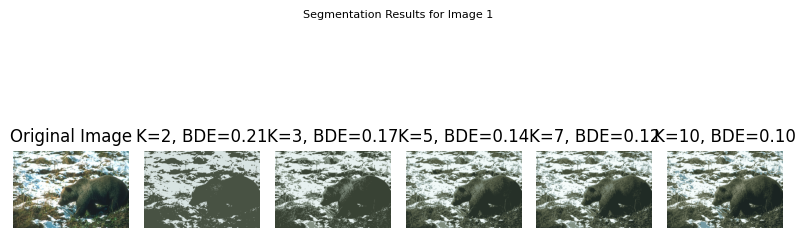

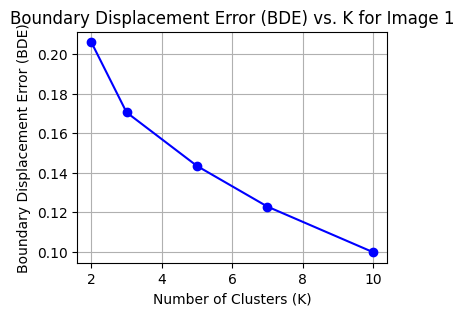

Processing image 2/10...


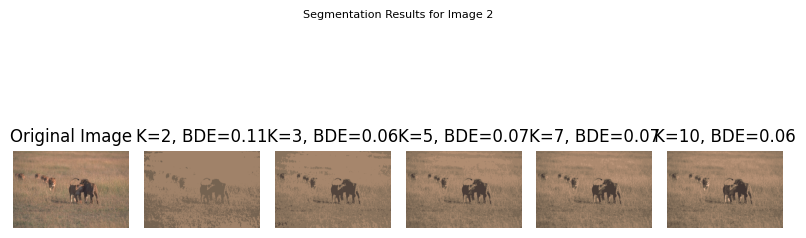

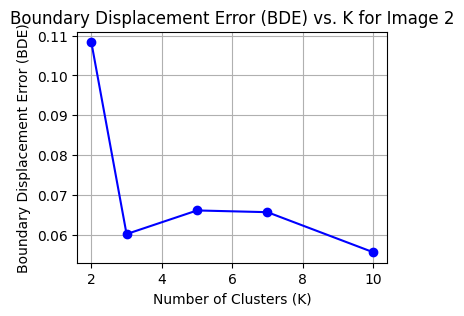

Processing image 3/10...


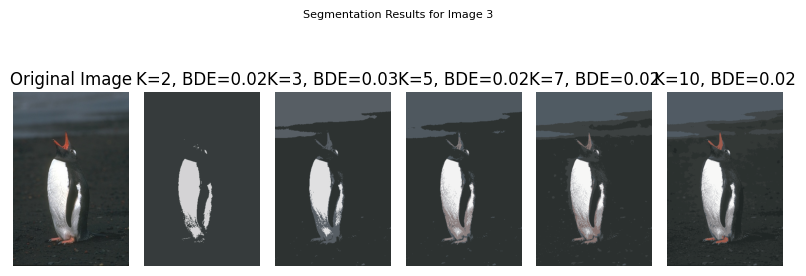

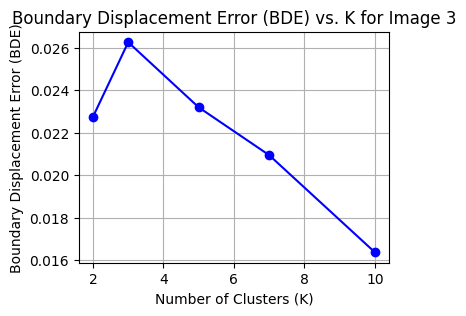

Processing image 4/10...


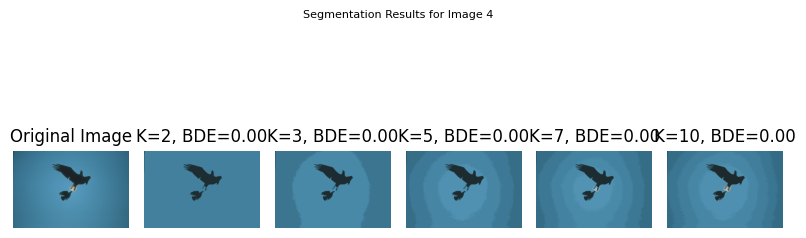

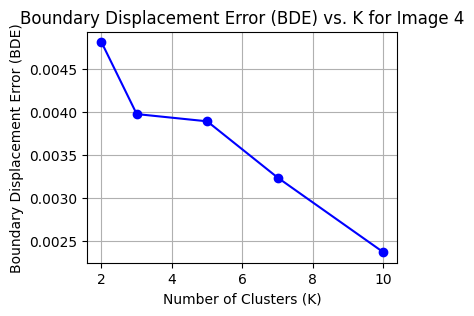

Processing image 5/10...


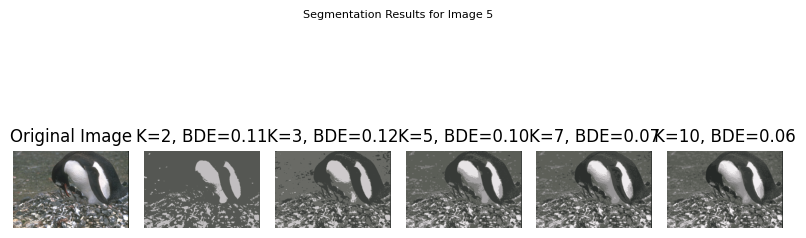

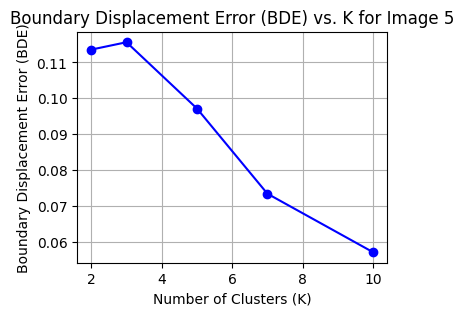

Processing image 6/10...


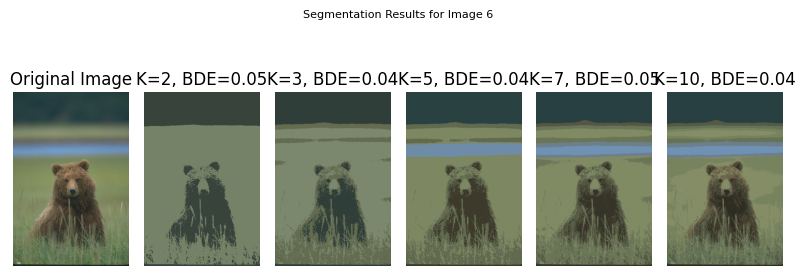

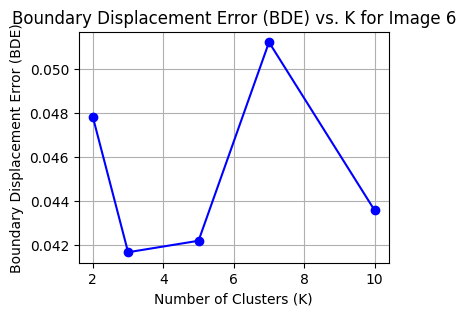

Processing image 7/10...


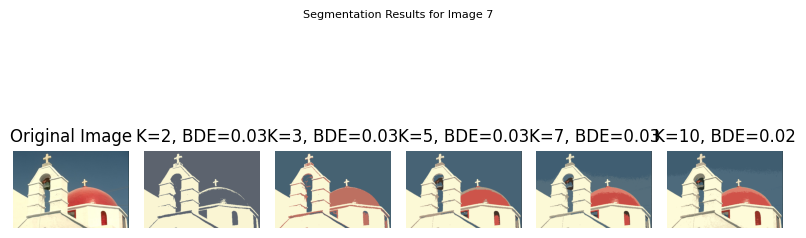

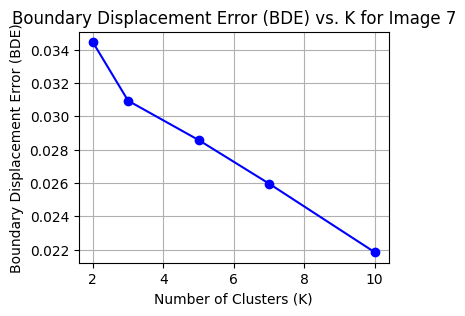

Processing image 8/10...


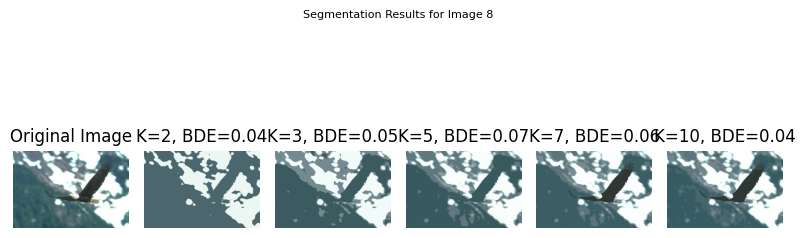

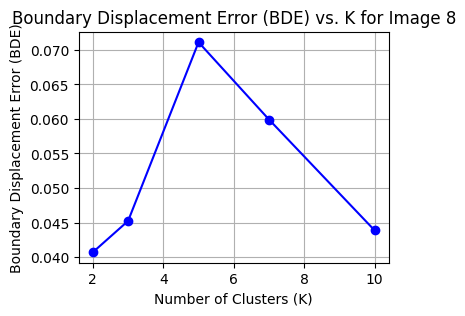

Processing image 9/10...


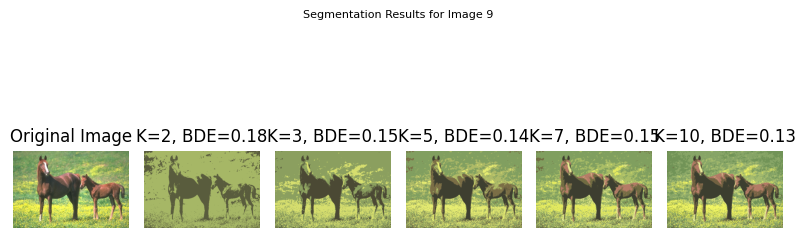

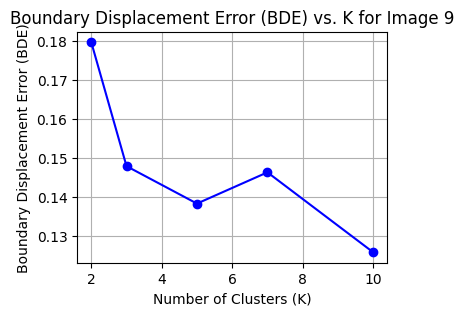

Processing image 10/10...


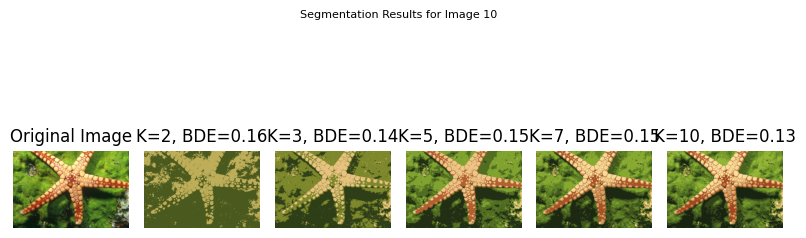

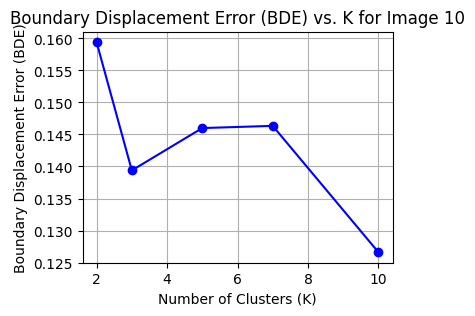

In [ ]:
# Define the range of K values to test
k_values = [2, 3, 5, 7, 10]

for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    print(f"Processing image {idx + 1}/{len(images_normalized)}...")

    bde_scores = []

    plt.figure(figsize=(8, 6))

    plt.subplot(2, len(k_values) + 1, 1)
    plt.imshow(image_normalized)
    plt.title("Original Image")
    plt.axis("off")

    for i, k in enumerate(k_values):
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)

        bde = calculate_bde(image_normalized, reconstructed_image)
        bde_scores.append(bde)

        plt.subplot(2, len(k_values) + 1, i + 2)
        plt.imshow(reconstructed_image)
        plt.title(f"K={k}, BDE={bde:.2f}")
        plt.axis("off")

    plt.suptitle(f"Segmentation Results for Image {idx + 1}", fontsize=8)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4, 3))
    plt.plot(k_values, bde_scores, marker='o', linestyle='-', color='b')
    plt.title(f"Boundary Displacement Error (BDE) vs. K for Image {idx + 1}")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Boundary Displacement Error (BDE)")
    plt.grid(True)
    plt.show()

**Visualize Segmentation Results**

Visualizing segmentation results for image 1/10...


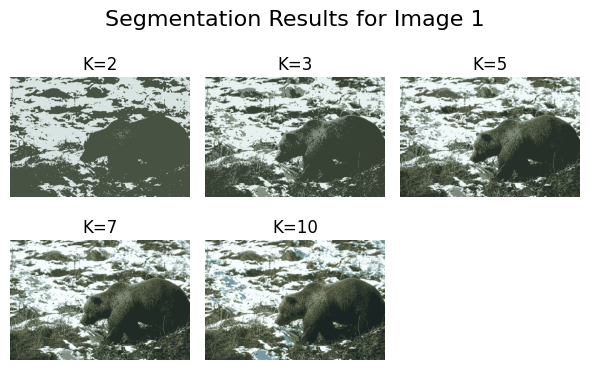

Visualizing segmentation results for image 2/10...


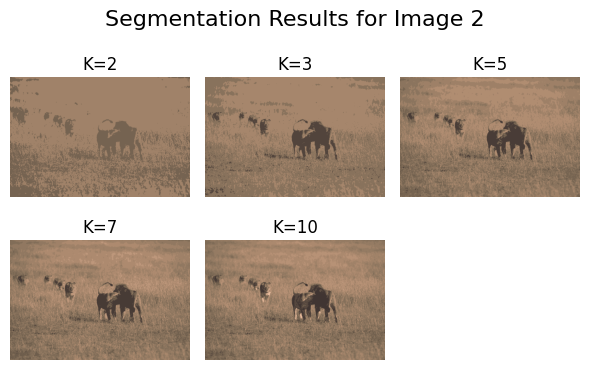

Visualizing segmentation results for image 3/10...


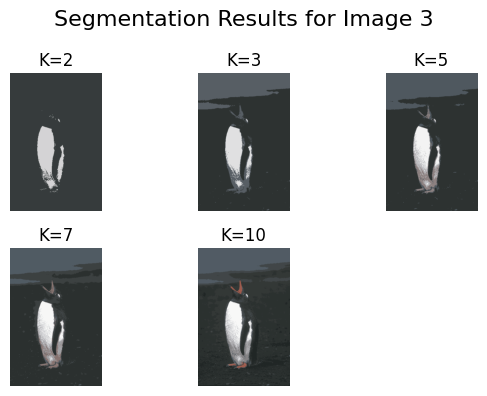

Visualizing segmentation results for image 4/10...


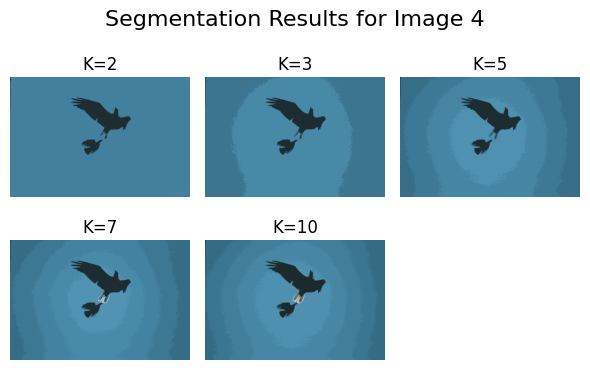

Visualizing segmentation results for image 5/10...


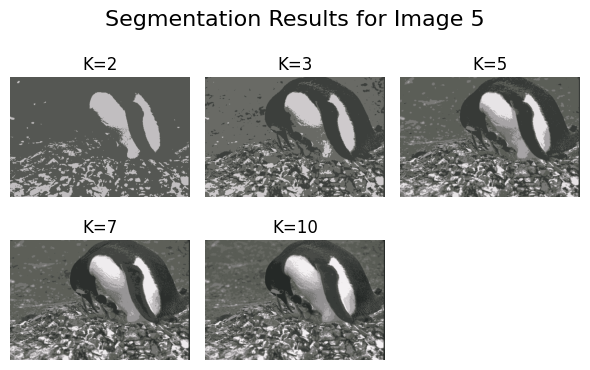

Visualizing segmentation results for image 6/10...


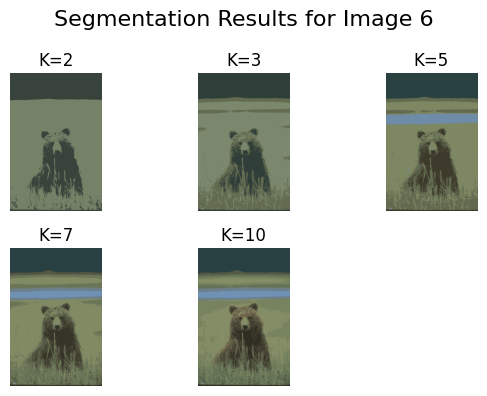

Visualizing segmentation results for image 7/10...


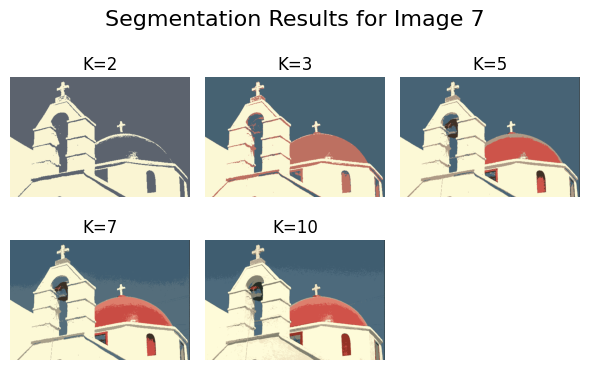

Visualizing segmentation results for image 8/10...


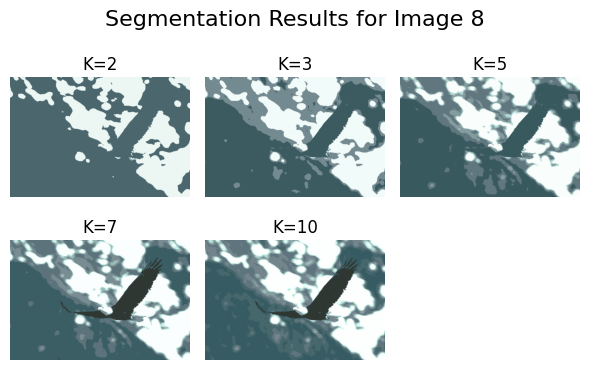

Visualizing segmentation results for image 9/10...


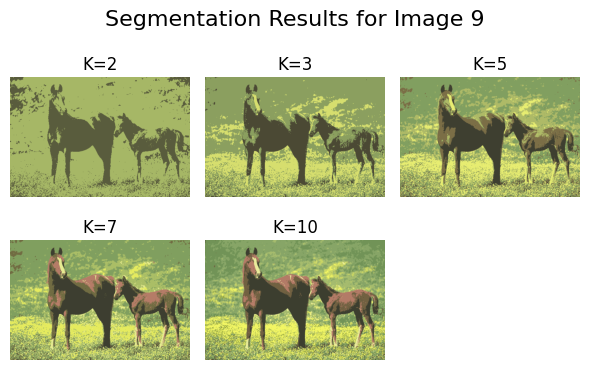

Visualizing segmentation results for image 10/10...


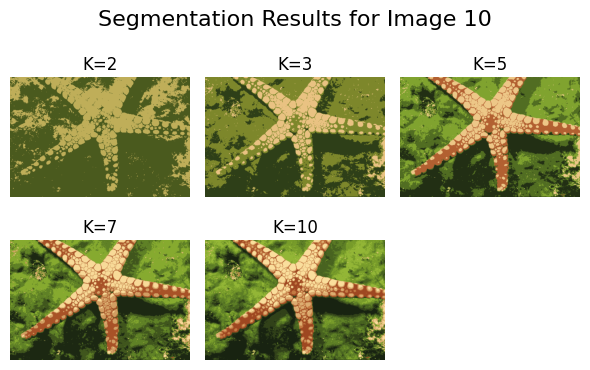

In [ ]:
for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    print(f"Visualizing segmentation results for image {idx + 1}/{len(images_normalized)}...")

    plt.figure(figsize=(6, 4))

    for i, k in enumerate(k_values):
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)

        plt.subplot(2, len(k_values) // 2 + 1, i + 1)
        plt.imshow(reconstructed_image)
        plt.title(f"K={k}")
        plt.axis("off")

    plt.suptitle(f"Segmentation Results for Image {idx + 1}", fontsize=16)
    plt.tight_layout()
    plt.show()

**Plot BDE Scores for Different K Values**

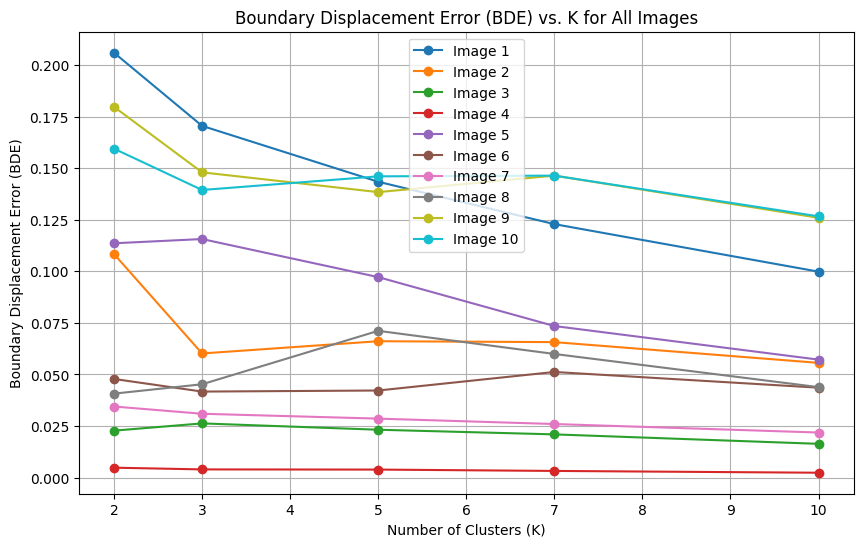

In [ ]:
# Plot the BDE scores for different K values across all images
plt.figure(figsize=(10, 6))

for idx, (image_normalized, image_reshaped) in enumerate(zip(images_normalized, images_reshaped)):
    bde_scores = []

    for k in k_values:
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(image_reshaped)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_
        reconstructed_image = cluster_centers[cluster_labels].reshape(image_normalized.shape)
        bde = calculate_bde(image_normalized, reconstructed_image)
        bde_scores.append(bde)

    plt.plot(k_values, bde_scores, marker='o', linestyle='-', label=f"Image {idx + 1}")

plt.title("Boundary Displacement Error (BDE) vs. K for All Images")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Boundary Displacement Error (BDE)")
plt.legend()
plt.grid(True)
plt.show()

**(2) How does the choice of K affect the segmentation results?**

- In K-means image segmentation, the value of K (number of clusters) directly influences the level of detail and accuracy. Smaller K values (example 2 to 3) produce a coarser segmentation, grouping larger image areas with similar colors but potentially overlooking finer details. As K increases to a moderate range (example 5 to 7), the segmentation becomes more refined, capturing finer details and preserving meaningful object boundaries. However, using a very large K (10 or more) leads to over-segmentation, where even small variations are segmented into separate clusters, introducing unnecessary noise and increasing computational burden. Finding the optimal K value is key to balancing detail and efficiency.


**(3) What are the limitations of using K-Means for image segmentation?**

- **Assumes Spherical Clusters:** K-Means uses Euclidean distance, which assumes clusters are spherical. This may not align with real object boundaries, leading to inaccurate segmentation.

- **Requires Pre-defining K:** The optimal number of clusters (K) needs to be pre-defined, but it varies for different images and is often unknown beforehand.

- **Sensitive to Initialization:** The initial placement of centroids can affect the final segmentation results, leading to inconsistency across different runs.

- **Ignores Spatial Information:** K-Means doesn't consider the spatial relationships between pixels, which can result in noisy segmentations.

- **Poor for Textured Regions:** It struggles to differentiate textures and gradual color changes, leading to inaccurate segmentations in such regions.

What is K-means Clustering?

K-means clustering is an unsupervised machine learning algorithm used for clustering tasks.

The goal of K-means clustering is to group a set of data points into K distinct clusters, where each data point belongs to the cluster whose mean (centroid) is closest to it.

K-means is particularly useful when you want to partition data into groups with similar characteristics.

How K-means Clustering Works:
The K-means algorithm follows an iterative approach to partition data into K clusters:

Initialization:
Choose K initial cluster centroids (often randomly chosen from the dataset).

Assignment Step:
Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance).

Update Step:
After assigning all data points to clusters, calculate the new centroids by taking the mean of all points in each cluster.

Repeat:
Repeat the assignment and update steps until convergence (when the centroids no longer change significantly between iterations).

Formula for K-means:
Let
𝐶
𝑘
C
k
​
  be the centroid of the
𝑘
𝑡
ℎ
k
th
  cluster, and
𝑥
𝑖
x
i
​
  be the data point. The objective is to minimize the sum of squared distances between each point and its assigned centroid:

Objective Function
=
∑
𝑘
=
1
𝐾
∑
𝑖
∈
𝐶
𝑘
∣
∣
𝑥
𝑖
−
𝐶
𝑘
∣
∣
2
Objective Function=
k=1
∑
K/
​
  
i∈C
k
​

∑
​
 ∣∣x
i
​
 −C
k
​
 ∣∣
2

Where:

𝐾
K is the number of clusters,

𝐶
𝑘
C
k
​
  is the centroid of the
𝑘
𝑡
ℎ
k
th
  cluster,

𝑥
𝑖
x
i
​
  is the data point,

∣
∣
𝑥
𝑖
−
𝐶
𝑘
∣
∣
2
∣∣x
i
​
 −C
k
​
 ∣∣
2
  is the squared Euclidean distance between the data point and the centroid.

Key Parameters of K-means:
K (Number of Clusters):
This is the number of clusters you want to form. The choice of K is important and can be determined using methods like the Elbow Method or Silhouette Analysis.

Centroids:
These are the mean points of each cluster, and they are updated during the algorithm’s iterations.

Distance Metric:
K-means typically uses Euclidean distance to measure the distance between data points and centroids, although other distance metrics can also be used.

Advantages of K-means Clustering:
Simplicity and Efficiency:
K-means is easy to understand and computationally efficient, especially for large datasets.

Scalability:
It scales well with large datasets and is faster than other clustering algorithms like hierarchical clustering.

Works well when clusters are spherical and roughly of similar size.

Disadvantages of K-means Clustering:
Choosing K:
The number of clusters
𝐾
K must be specified beforehand. If you choose the wrong K, the algorithm might produce poor results.

Sensitive to Initial Centroids:
The final clustering depends on the initial choice of centroids, and different initializations can lead to different results. Using techniques like K-means++ can help address this.

Not suitable for clusters of varying sizes or densities.

Outliers:
K-means is sensitive to outliers, as they can affect the placement of centroids.

Steps to Apply K-means Clustering:
Choose K:
Decide how many clusters you want to form.

Initialize Centroids:
Randomly initialize K centroids (or use the K-means++ method for better initialization).

Assign Points to Clusters:
Assign each data point to the nearest centroid.

Update Centroids:
Recalculate the centroids by taking the mean of all data points in each cluster.

Repeat Until Convergence:
Continue the assignment and update steps until the centroids no longer change or the algorithm reaches a maximum number of iterations.

Common Use Cases of K-means Clustering:
Market Segmentation:
Grouping customers based on similar purchasing behavior.

Image Compression:
Reducing the number of colors in an image by clustering pixel values.

Document Clustering:
Organizing documents into categories based on content similarity.

Anomaly Detection:
Identifying unusual data points (outliers) by placing them in small or singleton clusters.

Choosing the Optimal K:
To determine the optimal number of clusters
𝐾
K, we can use the Elbow Method or Silhouette Score:

Elbow Method:
Plot the sum of squared distances (inertia) for different values of
𝐾
K. The "elbow" of the plot indicates the optimal K.

Silhouette Score:
This metric evaluates how well each data point fits within its cluster. A high silhouette score indicates that the clusters are well-formed.

Example:
Imagine you have a dataset of customer spending behavior. You want to cluster customers into groups (e.g., high spenders, low spenders) to target them with personalized marketing.